In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Statistic_Assessment_24_05_2023\data.csv")
shape=data.shape
mean_before = np.mean(data[' Blood Pressure Before (mmHg)'])
mean_after = np.mean(data[' Blood Pressure After (mmHg)'])
print(f"mean_after : {mean_after}, mean_after :{mean_before}")


mean_after : 128.36, mean_after :133.91


In [6]:
data.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [14]:
# A. Measure dispersion
data["range_before"] = data[' Blood Pressure Before (mmHg)'] - data[' Blood Pressure After (mmHg)']
mean_absolute_deviation_before = sum(abs(data[' Blood Pressure Before (mmHg)'] - mean_before)) / shape[0]
mean_absolute_deviation_after = sum(abs(data[' Blood Pressure After (mmHg)'] - mean_after)) / shape[0]
sum_squared_deviation_before = sum((data[' Blood Pressure Before (mmHg)'] - mean_before)**2)
sum_squared_deviation_after = sum((data[' Blood Pressure After (mmHg)'] - mean_after)**2)

In [15]:
# A. Measure dispersion

variance_before = sum_squared_deviation_before/(shape[0]-1)
sd_before = np.sqrt(variance_before)
variance_after = sum_squared_deviation_after/(shape[0]-1)
sd_after = np.sqrt(variance_after)
max_before = max(data[" Blood Pressure Before (mmHg)"])
min_before = min(data[" Blood Pressure Before (mmHg)"])
max_after = max(data[' Blood Pressure After (mmHg)'])
min_after = min(data[" Blood Pressure After (mmHg)"])
range_before = max_after-min_before
range_after = max_after-min_after
print(f'range_before : {range_before} , range_after : {range_after}')
print(f'mean absolute deviation before:{mean_absolute_deviation_before}, mean absolute deviationafter: {mean_absolute_deviation_after} ')
print(f"Variance_before: , {variance_before}, sd_bfore:{sd_before}, Variance_after {variance_after}, sd_after{sd_after}")


range_before : 21 , range_after : 23
mean absolute deviation before:5.7118, mean absolute deviationafter: 5.9 
Variance_before: , 43.53727272727271, sd_bfore:6.598278012275075, Variance_after 47.4448484848485, sd_after6.8880221025232276


In [17]:
"""interpretation 
The mean absolute deviation (MAD) is a measure of theaverage distance between each data point and the mean. Inthis case, the mean absolute deviation before isapproximately 5.7118, and the mean absolute deviation afteris approximately 5.9.
The MAD indicates the average amount of deviation or spreadin the data from the mean value. A higher MAD suggests ahigher variability or dispersion in the data points. Inthis case, both before and after measurements have asimilar MAD, indicating a similar level of dispersion inthe data.
The variance and standard deviation provide additionalmeasures of the spread of the data. The variance before isapproximately 43.5373, with a standard deviation ofapproximately 6.5983. The variance after is approximately47.4448, with a standard deviation of approximately 6.8880.
The variance quantifies the average squared deviation fromthe mean, while the standard deviation is the square rootof the variance and provides a measure of the averagedeviation from the mean. In this case, both before andafter measurements have similar variances and standarddeviations, indicating a similar level of dispersion orspread in the data.
Overall, these measures of dispersion provide insights intothe spread or variability of the blood pressuremeasurements before and after.
"""

Lower_bound_before : 132.6167375095941Upper_bound_before : 135.2032624904059
Lower_bound_after : 127.00994766790546,Upper_bound_after : 129.71005233209456


In [18]:
# b. Calculate mean and 5% confidence interval and plot itin a graph
    # critical_value = 0.05/2 = 1- 0.025 = P_value = AUC =0.975 = Z_Score = 1.96( from Z table)
    # lower_bound = mean-("cirtical value"* sd/sqrt(n))
    # upper_bound = mean+("cirtical value"* sd/sqrt(n))
critical_value  = 1.96
lower_bound_before = mean_before - (1.96 * sd_before/np.sqrt(shape[0]))
upper_bound_before = mean_before + (1.96 * sd_before/np.sqrt(shape[0]))
print(f"Lower_bound_before : {lower_bound_before}Upper_bound_before : {upper_bound_before}")
lower_bound_after = mean_after - (1.96 * sd_after/np.sqrt(shape[0]))
upper_bound_after = mean_after + (1.96 * sd_after/np.sqrt(shape[0]))
print(f"Lower_bound_after : {lower_bound_after},Upper_bound_after : {upper_bound_after}")


Lower_bound_before : 132.6167375095941Upper_bound_before : 135.2032624904059
Lower_bound_after : 127.00994766790546,Upper_bound_after : 129.71005233209456


<function matplotlib.pyplot.show(close=None, block=None)>

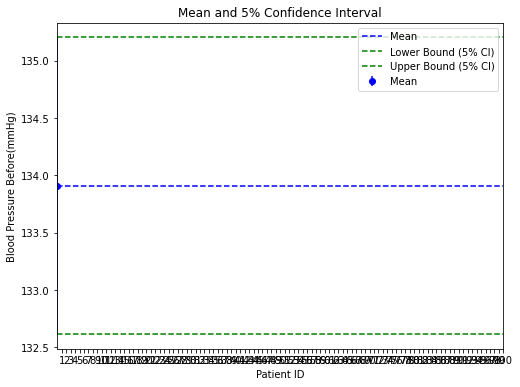

In [20]:
plt.figure(figsize=(8, 6))
plt.errorbar(0, mean_before, yerr=(upper_bound_before - mean_before), fmt='o', label='Mean', color='blue')
plt.axhline(y=mean_before, color='blue', linestyle='--', label='Mean')
plt.axhline(y=lower_bound_before, color ='green', linestyle='--',label='Lower Bound (5% CI)')
plt.axhline(y=upper_bound_before, color ='green', linestyle='--',label='Upper Bound (5% CI)')
plt.xticks(range(1, shape[0]+1), data['Patient ID'])
plt.xlabel("Patient ID")
plt.ylabel("Blood Pressure Before(mmHg)")
plt.title("Mean and 5% Confidence Interval")
plt.legend()
plt.show

In [21]:
from scipy.stats import pearsonr
r, p_value = pearsonr(data[' Blood Pressure Before (mmHg)'], data[' Blood Pressure After (mmHg)'])
t_value = r * np.sqrt((shape[0] - 2) / (1 - r**2))
print(f" correlation coefficient : {r} ,P_ value { p_value}")
print(f"t_value : {t_value}" )
""" interpretation 
Based on the calculated correlation coefficient of 0.9779, it indicates a strong positive correlation betweenthe "Blood Pressure Before" and "Blood Pressure After" measurements. 
The p-value of 1.8097e-68 indicates that the correlation coefficient is statistically significant at the 1%level of significance. This means that the observed correlation is highly unlikely to occur by chance, providingevidence to reject the null hypothesis of no correlation.
The calculated t-value of 46.3557 indicates the strength of the correlation and is used to assess thesignificance of the correlation coefficient. A large absolute t-value suggests a stronger correlation, and inthis case, the large t-value supports the significant correlation observed.
"""

 correlation coefficient : 0.9779485966556019 ,P_ value 1.8097381433068541e-68
t_value : 46.35573256849139


' interpretation \nBased on the calculated correlation coefficient of 0.9779, it indicates a strong positive correlation betweenthe "Blood Pressure Before" and "Blood Pressure After" measurements. \nThe p-value of 1.8097e-68 indicates that the correlation coefficient is statistically significant at the 1%level of significance. This means that the observed correlation is highly unlikely to occur by chance, providingevidence to reject the null hypothesis of no correlation.\nThe calculated t-value of 46.3557 indicates the strength of the correlation and is used to assess thesignificance of the correlation coefficient. A large absolute t-value suggests a stronger correlation, and inthis case, the large t-value supports the significant correlation observed.\n'